<img src="https://www.uninove.br/logo-uninove.svg" style="margin-left:auto; margin-right:true"/>

<h1 style="text-align: center; color:#3E2AA2;">Análise e tratamento de dados</h1>
<p style="text-align: center;"><b>BIG DATA, DATA ANALYTICS E FERRAMENTAS DE ANÁLISE DE DADOS IOT</b><br><b>Aluno: </b>Renato Batista de Almeida <b>RA: </b>621200587<br><b>
    Professor: </b>Fellipe Martins</p>    

# Índice

[1. Importar dependências](#dependencias) <br>
[2, Conectando uma fonte de dados do tipo CSV](#fontedados) <br>
[3. Renomeando e padronizando as colunas](#colunas) <br>
[4. Exibindo o tipo de dados](#tipodados) <br>
[5. Corrigindo a coluna "Pagamento" com data](#data) <br>
[6. Corrigindo a coluna "Valor"](#valor) <br>
[7. Reduzindo o uso de memória](#memoria) <br>
[8. Gráficos](#graficos) <br>


<a name="dependencias"><h3>1. Importar dependências</h2></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a name="fontedados"><h3>2. Conectando uma fonte de dados do tipo CSV</h2></a>


In [23]:
df = pd.read_csv("E:\\desktop\\uninove\\dados.csv", "r", delimiter=';', encoding="UTF-8")
df

,Pessoa Tipo,Centro de Custos,Grupo De Despesas,Despesa,Pagamento,Valor,Parcela,Forma de Pagto,Banco,Histórico
0,PJ,CUSTO FIXO GERAL,ADMINISTRAÇÃO,CAFÉ,02/01/2020,"R$ 420,42",NaN,INTERNET,OUTROS,insumos nescafe
1,PF,CUSTO FIXO GERAL,RECURSOS HUMANOS - SALÁRIOS,MARCELA DE BERNARDO,03/01/2020,"R$ 3.500,00",NaN,TRANSFERÊNCIA,ITAÚ PESSOA FÍSICA,NaN
2,PF,CUSTO FIXO GERAL,RECURSOS HUMANOS - SALÁRIOS,TAIANNY DUARTE,03/01/2020,"R$ 3.500,00",NaN,NaN,ITAÚ PESSOA FÍSICA,ultimo mes - dezembro - mudou pra franca
3,PJ,CUSTO FIXO GERAL,RECURSOS HUMANOS - SALÁRIOS,ANTONIELA MOTA DOS SANTOS,06/01/2020,"R$ 1.151,50",NaN,TRANSFERÊNCIA,ITAÚ PESSOA JURÍDICA,NaN
4,PJ,CUSTO FIXO GERAL,RECURSOS HUMANOS - BENEFÍCIOS VR,ANTONIELA MOTA DOS SANTOS,06/01/2020,"R$ 129,60",NaN,TRANSFERÊNCIA,ITAÚ PESSOA JURÍDICA,valor da cesta basica - esta de licenca matern...
...,...,...,...,...,...,...,...,...,...,...
378,PJ,CUSTO FIXO GERAL,IMOBILIZADO,EQUIPAMENTOS,23/12/2020,"R$ 1.855,00",NaN,INTERNET,ITAÚ PESSOA JURÍDICA,nobreak 5 kva
379,PF,CUSTO FIXO GERAL,ADMINISTRAÇÃO,VIVO FIBRA (TV À CABO),25/12/2020,"R$ 223,87",NaN,INTERNET,ITAÚ PESSOA JURÍDICA,deb auto
380,NC,CUSTO FIXO GERAL,MANUTENÇÕES,DIVERSOS MANUTENÇÃO,25/12/2020,"R$ 850,00",NaN,TRANSFERÊNCIA,ITAU CONJUNTA,"Gustavo eletricista - quadro de luz, instalac..."
381,PF,CUSTO FIXO GERAL,ADMINISTRAÇÃO,VIVO (11 3031-4910),27/12/2020,"R$ 126,71",NaN,INTERNET,ITAÚ PESSOA JURÍDICA,deb automatico


<a name="colunas"><h3>3. Renomeando e padronizando as colunas</h2></a>

In [24]:
df.columns

Index(['Pessoa Tipo', 'Centro de Custos', 'Grupo De Despesas', 'Despesa',
       'Pagamento', 'Valor', 'Parcela', 'Forma de Pagto', 'Banco',
       'Histórico'],
      dtype='object')

In [25]:
lista = []
for x in df.columns:    
    x = x.replace(" ", "_")    
    x = x.lstrip("_")
    x = x.rstrip("_")   
    lista.append(x)
    
df.columns = lista
df.columns

Index(['Pessoa_Tipo', 'Centro_de_Custos', 'Grupo_De_Despesas', 'Despesa',
       'Pagamento', 'Valor', 'Parcela', 'Forma_de_Pagto', 'Banco',
       'Histórico'],
      dtype='object')


Removendo acentos dos nomes das colunas

In [26]:
from unidecode import unidecode    

lista = []
for x in df.columns:
    x = unidecode(x)
    lista.append(x)
    
df.columns = lista
df.columns

Index(['Pessoa_Tipo', 'Centro_de_Custos', 'Grupo_De_Despesas', 'Despesa',
       'Pagamento', 'Valor', 'Parcela', 'Forma_de_Pagto', 'Banco',
       'Historico'],
      dtype='object')

<a name="tipodados"><h3>4. Exibindo o tipo de dados</h2></a>

In [27]:
df.dtypes

Pessoa_Tipo           object
Centro_de_Custos      object
Grupo_De_Despesas     object
Despesa               object
Pagamento             object
Valor                 object
Parcela              float64
Forma_de_Pagto        object
Banco                 object
Historico             object
dtype: object

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pessoa_Tipo        383 non-null    object 
 1   Centro_de_Custos   383 non-null    object 
 2   Grupo_De_Despesas  383 non-null    object 
 3   Despesa            383 non-null    object 
 4   Pagamento          383 non-null    object 
 5   Valor              383 non-null    object 
 6   Parcela            0 non-null      float64
 7   Forma_de_Pagto     381 non-null    object 
 8   Banco              383 non-null    object 
 9   Historico          203 non-null    object 
dtypes: float64(1), object(9)
memory usage: 30.0+ KB


<a name="data"><h3>5. Corrigindo a coluna "Pagamento" com data</h2></a>

In [34]:
df.Pagamento

0      02/01/2020
1      03/01/2020
2      03/01/2020
3      06/01/2020
4      06/01/2020
          ...    
378    23/12/2020
379    25/12/2020
380    25/12/2020
381    27/12/2020
382    31/12/2020
Name: Pagamento, Length: 383, dtype: object

In [63]:
df.Pagamento =df.Pagamento.apply(pd.to_datetime)
df.Pagamento

0     2020-02-01
1     2020-03-01
2     2020-03-01
3     2020-06-01
4     2020-06-01
         ...    
378   2020-12-23
379   2020-12-25
380   2020-12-25
381   2020-12-27
382   2020-12-31
Name: Pagamento, Length: 383, dtype: datetime64[ns]

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Pessoa_Tipo        383 non-null    object        
 1   Centro_de_Custos   383 non-null    object        
 2   Grupo_De_Despesas  383 non-null    object        
 3   Despesa            383 non-null    object        
 4   Pagamento          383 non-null    datetime64[ns]
 5   Valor              383 non-null    object        
 6   Parcela            0 non-null      float64       
 7   Forma_de_Pagto     381 non-null    object        
 8   Banco              383 non-null    object        
 9   Historico          203 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 30.0+ KB


<a name="valor"><h3>6. Corrigindo a coluna "Valor"</h2></a>

In [12]:
df.Valor.dtype

dtype('O')

In [13]:
def real_para_float(x):
    x = (x
         .replace(" ", "")
         .replace("R$","")
         .replace(".", "")
         .replace(",", ".")
        )
    return float(x)

In [66]:
df.Valor = (df.Valor
                     .apply(real_para_float)
                    )

df.Valor

0       420.42
1      3500.00
2      3500.00
3      1151.50
4       129.60
        ...   
378    1855.00
379     223.87
380     850.00
381     126.71
382    2695.00
Name: Valor, Length: 383, dtype: float64

In [15]:
df.Valor.dtype

dtype('float64')

<a name="memoria"><h3>7. Reduzindo o uso de memória</h2></a>

In [71]:
memoria = df.memory_usage(deep="True").sum()
memoria

208124

In [73]:
# Obrigado Déborah pela indicação da função! - - Tudo se copia (;

def reduz_memoria(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()            
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: 
        print('Uso de memória caiu para {:5.2f} Mb ({:.1f}% de redução)'.format(
            end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [70]:
reduz_memoria(df)

Uso de memória caiu para  0.03 Mb (7.5% de redução)


,Pessoa_Tipo,Centro_de_Custos,Grupo_De_Despesas,Despesa,Pagamento,Valor,Parcela,Forma_de_Pagto,Banco,Historico
0,PJ,CUSTO FIXO GERAL,ADMINISTRAÇÃO,CAFÉ,2020-02-01,420.5000,NaN,INTERNET,OUTROS,insumos nescafe
1,PF,CUSTO FIXO GERAL,RECURSOS HUMANOS - SALÁRIOS,MARCELA DE BERNARDO,2020-03-01,3500.0000,NaN,TRANSFERÊNCIA,ITAÚ PESSOA FÍSICA,NaN
2,PF,CUSTO FIXO GERAL,RECURSOS HUMANOS - SALÁRIOS,TAIANNY DUARTE,2020-03-01,3500.0000,NaN,NaN,ITAÚ PESSOA FÍSICA,ultimo mes - dezembro - mudou pra franca
3,PJ,CUSTO FIXO GERAL,RECURSOS HUMANOS - SALÁRIOS,ANTONIELA MOTA DOS SANTOS,2020-06-01,1152.0000,NaN,TRANSFERÊNCIA,ITAÚ PESSOA JURÍDICA,NaN
4,PJ,CUSTO FIXO GERAL,RECURSOS HUMANOS - BENEFÍCIOS VR,ANTONIELA MOTA DOS SANTOS,2020-06-01,129.6250,NaN,TRANSFERÊNCIA,ITAÚ PESSOA JURÍDICA,valor da cesta basica - esta de licenca matern...
...,...,...,...,...,...,...,...,...,...,...
378,PJ,CUSTO FIXO GERAL,IMOBILIZADO,EQUIPAMENTOS,2020-12-23,1855.0000,NaN,INTERNET,ITAÚ PESSOA JURÍDICA,nobreak 5 kva
379,PF,CUSTO FIXO GERAL,ADMINISTRAÇÃO,VIVO FIBRA (TV À CABO),2020-12-25,223.8750,NaN,INTERNET,ITAÚ PESSOA JURÍDICA,deb auto
380,NC,CUSTO FIXO GERAL,MANUTENÇÕES,DIVERSOS MANUTENÇÃO,2020-12-25,850.0000,NaN,TRANSFERÊNCIA,ITAU CONJUNTA,"Gustavo eletricista - quadro de luz, instalac..."
381,PF,CUSTO FIXO GERAL,ADMINISTRAÇÃO,VIVO (11 3031-4910),2020-12-27,126.6875,NaN,INTERNET,ITAÚ PESSOA JURÍDICA,deb automatico


<a name="graficos"><h3>8. Gráficos</h2></a>

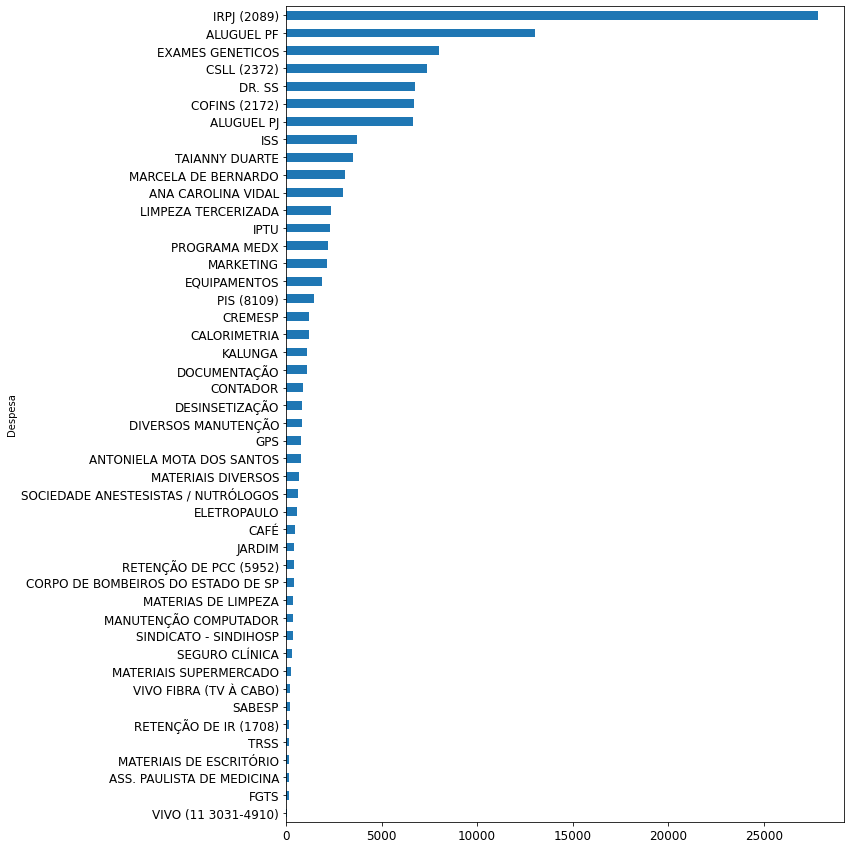

In [136]:
(df.groupby("Despesa")
 ["Valor"]
 .mean()
 .sort_values()
).plot(kind="barh", 
       figsize=(10,15),
       fontsize=12
      );

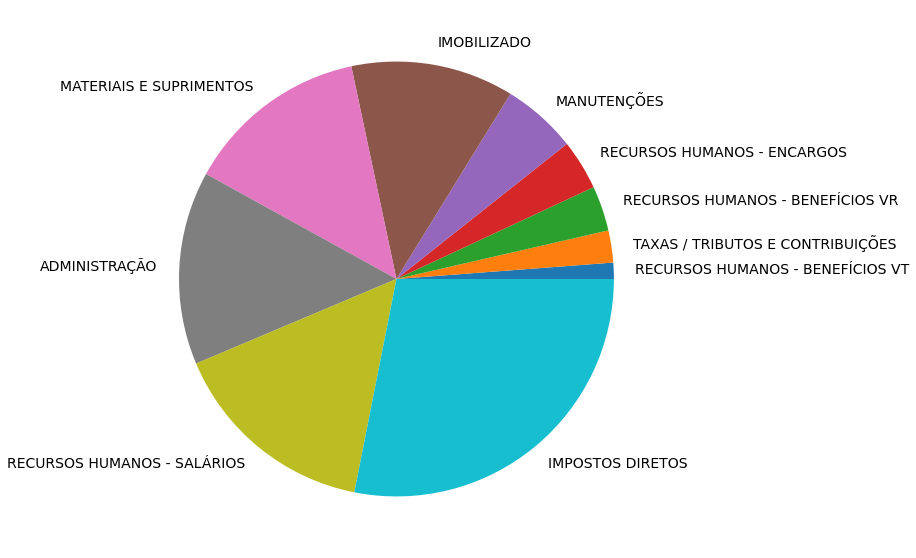

In [102]:
(df.groupby("Centro_de_Custos")
 ["Valor"]
 .mean()
 .sort_values()
).plot(kind="pie", 
       label="", 
       figsize=(10,10),
       fontsize=14
      );

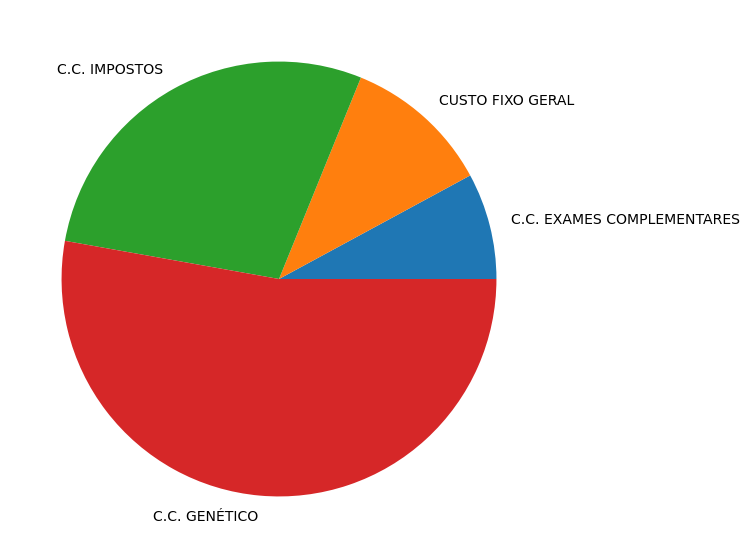

In [104]:
(df.groupby("Centro_de_Custos")
 ["Valor"]
 .mean()
 .sort_values()
).plot(kind="pie", 
       label="", 
       figsize=(10,10),
       fontsize=14
      );

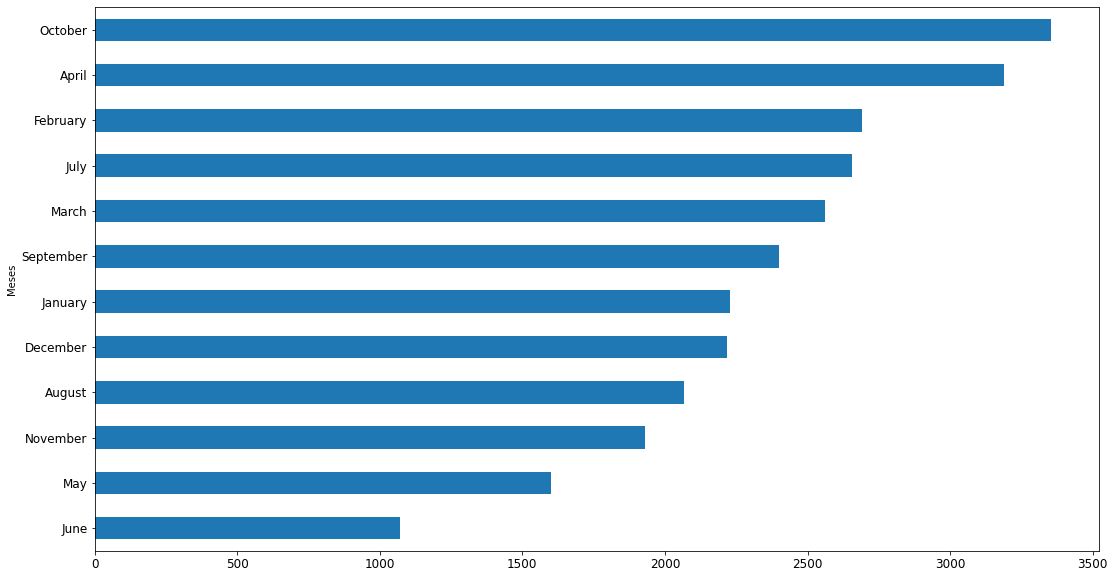

In [132]:
df['Meses'] = df['Pagamento'].apply(lambda x:x.strftime('%B'))

df.sort_values(["Meses"])

(df.groupby("Meses")
 ["Valor"]
 .mean()
 .sort_values()
).plot(kind="barh", 
       figsize=(18,10),
       fontsize=12
      );